Equivalent to `replicate` `R` function in `Python`

In [4]:
[ [2-5] for _ in range(5) ]

[[-3], [-3], [-3], [-3], [-3]]

In [3]:
import numpy as np

In [26]:
X1 = [1,2,3,4,5,6,7]
X2 = [6,7,88,5,17,14,1,17,52]

In [27]:
a = [ (np.random.choice( X1 , 5, replace=False)).mean() - (np.random.choice( X2 , 5, replace=False)).mean()   for  _ in range(5) ]

In [28]:
a

[-4.6000000000000005, -30.6, -23.8, -13.399999999999999, -33.6]

In [32]:
np.array(a).std()

10.819242117634673

### Computing PAI with resampling methods:

#### In Linear Regression:

In [11]:
import numpy as np
import pandas as pd

Old Data 

In [30]:
np.random.seed(123)

# Quantitative Response

Y_old = np.random.normal(loc=50, scale=10, size=500)

# Quantitative variables 

X1_old = np.random.normal(loc=30, scale=25, size=500)
 
# Binary variables 

X2_old = np.random.uniform(low=0.0, high=1.0, size=500).round()
 
# Multiclass categorical variables

X3_old = np.random.uniform(low=0, high=4, size=500).round()   # categories: 0,1,2,3,4
 

In [31]:
Old_Data_Set = pd.DataFrame({ 'Y_old': Y_old , 'X1_old': X1_old , 'X2_old': X2_old, 'X3_old': X3_old  })

In [32]:
Old_Data_Set.head()

,Y_old,X1_old,X2_old,X3_old
0,39.143694,48.800842,1.0,1.0
1,59.973454,31.741019,0.0,3.0
2,52.829785,23.363859,0.0,4.0
3,34.937053,53.239612,1.0,1.0
4,44.213997,61.520532,1.0,3.0


New Data (with a big change in X1 distribution)

In [42]:
np.random.seed(666)

# Quantitative Response

Y_new = np.random.normal(loc=50, scale=10, size=500)

# Quantitative variables 

X1_new = np.random.normal(loc=15, scale=60, size=500)
 
# Binary variables 

X2_new = np.random.uniform(low=0.0, high=1.0, size=500).round()
 
# Multiclass categorical variables

X3_new = np.random.uniform(low=0, high=4, size=500).round()   # categories: 0,1,2,3,4

In [43]:
New_Data_Set = pd.DataFrame({ 'Y_new': Y_new , 'X1_new': X1_new , 'X2_new': X2_new, 'X3_new': X3_new  })

In [17]:
New_Data_Set.head()

,Y_new,X1_new,X2_new,X3_new
0,58.241881,9.203164,1.0,2.0
1,54.799660,103.497983,1.0,1.0
2,61.734680,24.247204,1.0,1.0
3,59.090481,16.480477,0.0,1.0
4,44.282785,72.025787,0.0,2.0


In [7]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_histogram, geom_bar, geom_boxplot, scale_y_continuous, scale_x_continuous, labs, after_stat,  geom_vline, scale_color_manual, theme_gray, theme_xkcd, scale_color_identity, geom_hline, facet_wrap, scale_fill_discrete, scale_fill_manual,  scale_fill_hue, guides, guide_legend, ggtitle
from mizani.formatters import percent_format 

In [46]:
df_Old = pd.DataFrame( {"Y":Y_old , "X1": X1_old , "X2": X2_old , "X3": X3_old} ) 

df_New = pd.DataFrame( {"Y":Y_new , "X1": X1_new , "X2": X2_new , "X3": X3_new} ) 

In [55]:
df_Old_New = pd.concat([df_Old , df_New])

In [49]:
import array as arr

In [84]:
repeat_Old = ['Old Data']*len(Old_Data_Set)

In [85]:
repeat_New = ['New Dta']*len(New_Data_Set)

In [86]:
df_repeat_New = pd.DataFrame( {"group": repeat_New} ) 

df_repeat_Old = pd.DataFrame( {"group": repeat_Old} ) 

In [87]:
groups = pd.concat([df_repeat_Old , df_repeat_New])

In [88]:
df_Old_New_groups = pd.concat([df_Old_New , groups], axis=1 ) 

In [89]:
df_Old_New_groups

,Y,X1,X2,X3,group
0,39.143694,48.800842,1.0,1.0,Old Data
1,59.973454,31.741019,0.0,3.0,Old Data
2,52.829785,23.363859,0.0,4.0,Old Data
3,34.937053,53.239612,1.0,1.0,Old Data
4,44.213997,61.520532,1.0,3.0,Old Data
...,...,...,...,...,...
495,56.756956,12.495333,0.0,3.0,New Dta
496,36.846327,75.862895,1.0,1.0,New Dta
497,36.528625,-21.430239,0.0,0.0,New Dta
498,62.143112,-56.088634,0.0,2.0,New Dta


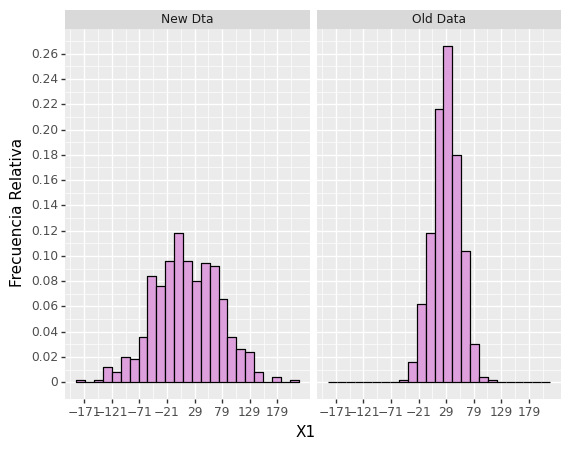

<ggplot: (96050426983)>

In [90]:
(
ggplot( df_Old_New_groups )
+  aes(x='X1' , y =  after_stat('width*density'))
+ geom_histogram(fill="plum", color="black", bins = 25)
+  labs(x = "X1", y = "Frecuencia Relativa")
+ scale_x_continuous( breaks = range(int(df_Old_New_groups['X1'].min()) , int(df_Old_New_groups['X1'].max()) , 50) ) 
+ scale_y_continuous( breaks = np.arange(0, 0.5, 0.02) )
+ facet_wrap('group')
)

In [107]:
Old_Data_Set.head()

,Y_old,X1_old,X2_old,X3_old
0,39.143694,48.800842,1.0,1.0
1,59.973454,31.741019,0.0,3.0
2,52.829785,23.363859,0.0,4.0
3,34.937053,53.239612,1.0,1.0
4,44.213997,61.520532,1.0,3.0


In [105]:
Old_Data_Set['X2_old'] = Old_Data_Set['X2_old'].astype('category')
Old_Data_Set['X3_old'] = Old_Data_Set['X3_old'].astype('category')

In [109]:
def varcharProcessing(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes

    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())

    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)

    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)

    else: 
        X = pd.get_dummies(X,drop_first=True)
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

In [147]:
B=100

y_predictions_Old_Data = np.zeros((B , len(Old_Data_Set)))

for i in range(0, B):

    Old_Data_Set_BOOT_SAMPLE = Old_Data_Set.sample( n=len(Old_Data_Set) , random_state=i , replace=True )    # i-th boot sample

    X_old = Old_Data_Set_BOOT_SAMPLE[['X1_old', 'X2_old', 'X3_old']]

    y_old = Old_Data_Set_BOOT_SAMPLE['Y_old']

    X_old = varcharProcessing(X_old, varchar_process = "dummy_dropfirst")

    Model_Py_sklearn = LinearRegression().fit(X_old, y_old)

    y_predictions_Old_Data[i, :] = Model_Py_sklearn.predict(X_old)    # y predictions for the i-th boot sample

The $(k , r)$ element of the $nxB$ matrix `y_predictions_Old_Data` is $\widehat{y_k}$ (the $Y$ estimation for the $k$-th individual of the sample) when the model is trained with the $r$-th boot sample of  `Old_Data_Set` 

Where: 

$n =$ len(Old\_Data\_Set)

$B=$ nº of boot samples

In [137]:
y_predictions_Old_Data 

array([[49.95603811, 46.17414532, 50.75655999, ..., 50.08960508,
        47.83454445, 49.71383292],
       [49.59227112, 48.59741738, 48.38773108, ..., 49.51214128,
        49.35931264, 49.0558362 ],
       [52.74603235, 50.39946487, 49.44548196, ..., 50.757313  ,
        50.85265078, 49.1753534 ],
       ...,
       [49.04014548, 49.32931668, 50.07903142, ..., 51.22241711,
        51.33767296, 49.02068145],
       [51.03904278, 47.92718562, 48.44246138, ..., 48.33406358,
        49.22132319, 48.48471234],
       [49.57212401, 50.58200126, 47.89645783, ..., 49.66999826,
        49.34546852, 48.03111945]])

We compute the standard deviation of each column of the matrix , and we get an estimation of $Var(\hat{y_i})$ for $i=1,...,n$:

So, the i-th value of the following vector is $$\widehat{Var}(\hat{y_i})$$

In [138]:
y_predictions_Old_Data.var(axis=0)  # compute the variance by cols in an array

array([2.3736694 , 1.83531851, 1.49999452, 2.02032802, 2.03471412,
       2.59662433, 2.32653866, 2.10161238, 2.51028022, 2.48036944,
       1.62799249, 1.81614304, 2.08080234, 2.46520527, 1.90376617,
       1.39392336, 2.15432888, 2.81813501, 1.87711112, 1.85249005,
       1.52218726, 2.01087683, 2.40951067, 2.01183162, 1.66672321,
       1.94795425, 1.9963901 , 2.14494738, 2.13831145, 2.2681182 ,
       1.93516707, 2.03019929, 1.86845261, 1.88852273, 1.72905494,
       2.29470579, 2.23117035, 2.21600616, 2.52484136, 2.00556638,
       2.22137462, 1.90636041, 1.95191852, 2.20370171, 1.99852729,
       2.45884646, 1.65150188, 1.86239492, 2.05955444, 2.08133178,
       2.09107018, 2.09175392, 2.06124553, 2.37485167, 1.88766883,
       2.49074997, 2.03945508, 2.0099999 , 2.41058172, 2.5622215 ,
       2.13638402, 1.41088064, 1.94105678, 2.08061339, 2.22737029,
       1.7952498 , 2.36554675, 1.88416718, 2.11025968, 2.34593621,
       2.43984327, 2.30048053, 1.673033  , 2.0588727 , 1.88850

In [125]:
len(y_predictions_Old_Data.var(axis=0))

500

Now, we compute the mean of the previous vector:

$$ \dfrac{1}{n} \cdot \sum_{i=1,...,n} \widehat{Var}(\hat{y_i})$$


In [148]:
y_predictions_Old_Data.var(axis=0).mean()  

2.0548992883622264

In [149]:
PAI_denominator = y_predictions_Old_Data.var(axis=0).mean()  

We repeat the previous process but now we get the response predictions for de predictors of the New_Data_Set (this is so important, taking into a count the PAI definitions).

In [ ]:
df_Old['X2'] = df_Old['X2'].astype('category')
df_Old['X3'] = df_Old['X3'].astype('category')

In [ ]:
df_New['X2'] = df_New['X2'].astype('category')
df_New['X3'] = df_New['X3'].astype('category')

In [183]:
B=100

y_predictions_New_Data = np.zeros((B , len(New_Data_Set)))

for i in range(0, B):

    # i-th boot sample of the Old Data

    df_Old_BOOT_SAMPLE = df_Old.sample( n=len(df_Old) , random_state=i , replace=True ) 
 

    
    X_old = df_Old_BOOT_SAMPLE[['X1', 'X2', 'X3']]  

    y_old =  df_Old_BOOT_SAMPLE['Y']

    X_old = varcharProcessing(X_old, varchar_process = "dummy_dropfirst")

    

    X_new = df_New[['X1', 'X2', 'X3']]

    y_new = df_New['Y']

    X_new = varcharProcessing(X_new, varchar_process = "dummy_dropfirst") 


    Model_Old_Boot_Sample = LinearRegression().fit(X_old, y_old)

    
    # y predictions for the New Data using the model trained with the Old Data Boot Sample
    # For this step with sk-learn is necessary X_new (test_set) columns have the same name as X_old (train set) columns

    y_predictions_New_Data[i, :] = Model_Old_Boot_Sample.predict(X_new)    

In [184]:
y_predictions_New_Data

array([[51.95230879, 51.47596327, 48.98802744, ..., 51.4565199 ,
        46.67139032, 49.54494499],
       [49.51661534, 49.41754122, 49.08934718, ..., 49.72370346,
        48.72501552, 50.06483792],
       [49.55966862, 52.89107468, 46.15098864, ..., 49.94414184,
        47.36621056, 50.30341723],
       ...,
       [49.26960368, 48.79390236, 49.64487893, ..., 49.67634691,
        49.4021568 , 51.24321942],
       [48.03599704, 49.38102812, 47.80497029, ..., 50.49153548,
        49.00657484, 50.95504889],
       [50.31951881, 49.56019913, 49.73180688, ..., 50.61998985,
        48.60762259, 50.24551538]])

In [185]:
y_predictions_New_Data.var(axis=0).mean() 

2.406479599837219

In [186]:
PAI_numerator = y_predictions_New_Data.var(axis=0).mean()  

Now we can compute the PAI as follows:

We are going to consider the following definition of PAI (instead of use the variance, we will use the standard deviation. if we would consider the PAI definition with the variance, the process to compute it would have been very similar)

$$ 

PAI = \dfrac{\dfrac{1}{N} \sum_{i \in NewData} \widehat{Var}(\hat{y}_i)}{\dfrac{1}{n} \sum_{i \in OldData} \widehat{Var}(\hat{y}_i)}  

$$

In [187]:
PAI_numerator

2.406479599837219

In [144]:
PAI_denominator

2.0548992883622264

In [188]:
PAI = PAI_numerator / PAI_denominator

In [189]:
PAI

1.171093694696447

Then, in mean, the variance of the response predictions using the New Data Set is 1.17 times greater than the variance of the response predictions using the Old Data Set.

Following the interpretation "values less than 1.1 indicate no significant deterioration; values from 1.1 to 1.5 indicate a deterioration requiring further investigation, values exceeding 1.5 indicate the predictive
accuracy of the model has deteriorated significantly" exposed in the paper `The Population Accuracy Index: A New Measure of
Population Stability for Model Monitoring` , the PAI value that we have got indicates a deterioration of  the model predictive
accuracy , so could be recommendable to train again the model using the New Data Set instead the Old.

## Bibliography

Resampling methods in Python https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html